<a href="https://colab.research.google.com/github/snehasrini99/Network_attack_classification/blob/main/ML_modeling_KDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Modeling_KDD data
running different ML algorithms with KDD dataset to sort which ML algorithm works best with Network dataset and saves only the attack labels for further usage

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay #changed From sklearn 1.2
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix

# Turn off the warnings.
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/24Spring/NSP/Project

/content/drive/MyDrive/24Spring/NSP/Project


## Cleaned KDD Data

In [ ]:
Trained_Data_KDD = pd.read_csv("/content/drive/MyDrive/24Spring/NSP/Project/Data_final/Cleaned_Trained_Data.csv" , sep = "," , encoding = 'utf-8')
Tested_Data_KDD = pd.read_csv("/content/drive/MyDrive/24Spring/NSP/Project/Data_final/Cleaned_Tested_Data.csv" , sep = "," , encoding = 'utf-8')

In [ ]:
Trained_Data_KDD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [ ]:
Tested_Data_KDD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

### Data Encoding

In [ ]:
#new columns can be added (one for each unique category)
Trained_Data_KDD = pd.get_dummies(Trained_Data_KDD,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")
Tested_Data_KDD = pd.get_dummies(Tested_Data_KDD,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")

In [ ]:
LE = LabelEncoder()
attack_LE= LabelEncoder()
Trained_Data_KDD['attack'] = attack_LE.fit_transform(Trained_Data_KDD["attack"])
Tested_Data_KDD['attack'] = attack_LE.fit_transform(Tested_Data_KDD["attack"])

### Data Splitting

In [ ]:
X_train_KDD = Trained_Data_KDD.drop(['attack', 'level', 'attack_state'], axis=1)
X_test_KDD = Tested_Data_KDD.drop(['attack', 'level', 'attack_state'], axis=1)


Y_train_KDD = Trained_Data_KDD['attack_state']
Y_test_KDD = Tested_Data_KDD['attack_state']

X_train_train_KDD,X_test_train_KDD ,Y_train_train_KDD,Y_test_train_KDD = train_test_split(X_train_KDD, Y_train_KDD, test_size= 0.25 , random_state=42)

# Variable names
# X_train = X_train_train_KDD_a
# Y_train = Y_train_train_KDD_a

# X_test = X_test_train_KDD_a
# Y_test = Y_test_train_KDD_a

### Data Scaling

In [ ]:
Ro_scaler = RobustScaler()
X_train_train_KDD = Ro_scaler.fit_transform(X_train_train_KDD)
X_test_train_KDD = Ro_scaler.transform(X_test_train_KDD)

In [ ]:
X_train_train_KDD.shape, Y_train_train_KDD.shape
X_test_train_KDD.shape, Y_test_train_KDD.shape

((31493, 122), (31493,))

### VIF

In [ ]:
A = sm.add_constant(X_train_KDD.astype(float))
Est1 = sm.GLM(Y_train_KDD, A)
Est2 = Est1.fit()
Est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           attack_state   No. Observations:               125972
Model:                            GLM   Df Residuals:                   125854
Model Family:                Gaussian   Df Model:                          117
Link Function:               Identity   Scale:                        0.030165
Method:                          IRLS   Log-Likelihood:                 41832.
Date:                Tue, 07 May 2024   Deviance:                       3796.3
Time:                        15:27:39   Pearson chi2:                 3.80e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9993
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.3035      0.008     40.015      0.000       0.289       0.318
duration                    -4.074e-06   2.35e-07    -17.350      0.000   -4.53e-06   -3.61e-06
src_bytes                    4.584e-10   8.53e-11      5.373      0.000    2.91e-10    6.26e-10
dst_bytes                     1.67e-10   1.22e-10      1.372      0.170   -7.17e-11    4.06e-10
land                           -0.2506      0.035     -7.079      0.000      -0.320      -0.181
wrong_fragment                  0.1968      0.002     86.967      0.000       0.192       0.201
urgent                         -0.0057      0.035     -0.165      0.869      -0.073       0.062
hot                             0.0251      0.000     55.886      0.000       0.024       0.026
num_failed_logins               0.0499      0.011      4.470      0.000       0.028       0.072
logged_in                       0.1670      0.004     42.903      0.000       0.159       0.175
num_compromised                 0.0086      0.001     13.969      0.000       0.007       0.010
root_shell                      0.1463      0.017      8.532      0.000       0.113       0.180
su_attempted                   -0.0668      0.018     -3.779      0.000      -0.101      -0.032
num_root                       -0.0086      0.001    -13.991      0.000      -0.010      -0.007
num_file_creations             -0.0121      0.001    -11.550      0.000      -0.014      -0.010
num_shells                     -0.0192      0.022     -0.858      0.391      -0.063       0.025
num_access_files                0.0338      0.007      4.991      0.000       0.021       0.047
num_outbound_cmds            6.425e-16   6.05e-16      1.062      0.288   -5.44e-16    1.83e-15
is_host_login                  -0.3679      0.174     -2.117      0.034      -0.708      -0.027
is_guest_login                 -0.4361      0.013    -34.383      0.000      -0.461      -0.411
count                           0.0002   1.03e-05     15.557      0.000       0.000       0.000
srv_count                       0.0004   1.53e-05     24.095      0.000       0.000       0.000
serror_rate                    -0.0656      0.012     -5.335      0.000      -0.090      -0.042
srv_serror_rate                 0.2685      0.013     20.041      0.000       0.242       0.295
rerror_rate                    -0.0820      0.013     -6.233      0.000      -0.108      -0.056
srv_rerror_rate                 0.6245      0.015     40.926      0.000       0.595       0.654
same_srv_rate                  -0.3404      0.004    -78.481      0.000      -0.349      -0.332
diff_srv_rate                  -0.0645      0.004    -15.392      0.000      -0.073      -0.056
srv_diff_host_rate              0.0376      0.002     15.366      0.000       0.033       0.042
dst_host_co

### Data Modeling

In [ ]:
def Evaluate(Model_Name, Model_Abb, X_test, Y_test):

    Pred_Value= Model_Abb.predict(X_test)
    Accuracy = metrics.accuracy_score(Y_test,Pred_Value)
    Sensitivity = metrics.recall_score(Y_test,Pred_Value)
    Precision = metrics.precision_score(Y_test,Pred_Value)
    F1_score = metrics.f1_score(Y_test,Pred_Value)
    Recall = metrics.recall_score(Y_test,Pred_Value)

    print('--------------------------------------------------\n')
    print('The {} Model Accuracy   = {}\n'.format(Model_Name, np.round(Accuracy,6)))
    print('The {} Model Sensitvity = {}\n'.format(Model_Name, np.round(Sensitivity,6)))
    print('The {} Model Precision  = {}\n'.format(Model_Name, np.round(Precision,6)))
    print('The {} Model F1 Score   = {}\n'.format(Model_Name, np.round(F1_score,6)))
    print('The {} Model Recall     = {}\n'.format(Model_Name, np.round(Recall,6)))
    print('--------------------------------------------------\n')

    Confusion_Matrix = metrics.confusion_matrix(Y_test, Pred_Value)
    plot_confusion_matrix(Confusion_Matrix,class_names=['Normal', 'Attack'],figsize=(5.55,5), colorbar= "blue")

    # changed into RocCurveDisplay https://github.com/mrdbourke/zero-to-mastery-ml/issues/45
    # RocCurveDisplay.from_estimator(estimator=gs_log_reg, X=X_test, y=y_test);
    RocCurveDisplay.from_estimator(estimator=Model_Abb, X=X_test, y=Y_test)

    return X_test, Y_test, Pred_Value

In [ ]:
def GridSearch(Model_Abb, Parameters, X_train, Y_train):
    Grid = GridSearchCV(estimator=Model_Abb, param_grid= Parameters, cv = 3, n_jobs=-1)
    Grid_Result = Grid.fit(X_train, Y_train)
    Model_Name = Grid_Result.best_estimator_

    return (Model_Name)

#### Logistic Regression

In [ ]:
LR_KDD = LogisticRegression()
LR_KDD.fit(X_train_train_KDD , Y_train_train_KDD)

LogisticRegression()

--------------------------------------------------

The Logistic Regression Model Accuracy   = 0.860667

The Logistic Regression Model Sensitvity = 0.921411

The Logistic Regression Model Precision  = 0.808362

The Logistic Regression Model F1 Score   = 0.861192

The Logistic Regression Model Recall     = 0.921411

--------------------------------------------------



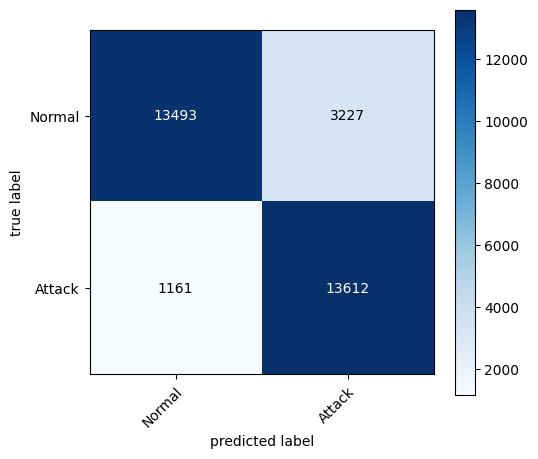

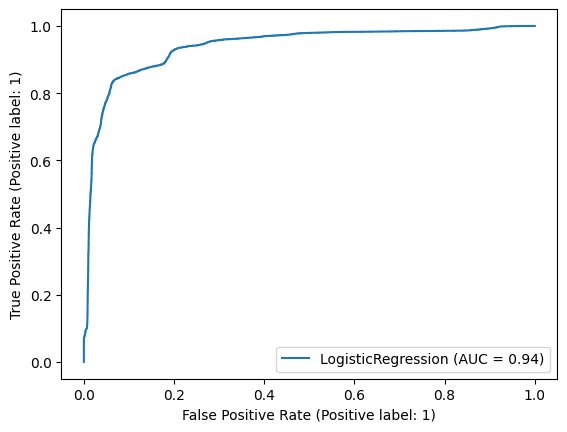

In [ ]:
X_test_KDD_LR, Y_test_KDD_LR, Pred_Value_KDD_LR = Evaluate('Logistic Regression', LR_KDD, X_test_train_KDD, Y_test_train_KDD)

#### Decision Tree

In [ ]:
DT_KDD = DecisionTreeClassifier(max_features=6, max_depth=4)
DT_KDD.fit(X_train_train_KDD, Y_train_train_KDD)

DecisionTreeClassifier(max_depth=4, max_features=6)

--------------------------------------------------

The Decision Tree Classifier Model Accuracy   = 0.92049

The Decision Tree Classifier Model Sensitvity = 0.903202

The Decision Tree Classifier Model Precision  = 0.925505

The Decision Tree Classifier Model F1 Score   = 0.914217

The Decision Tree Classifier Model Recall     = 0.903202

--------------------------------------------------



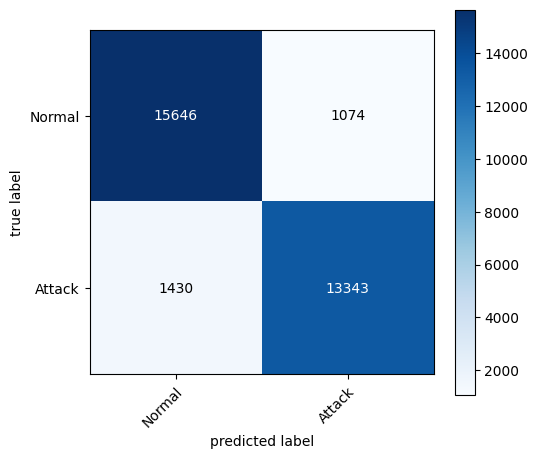

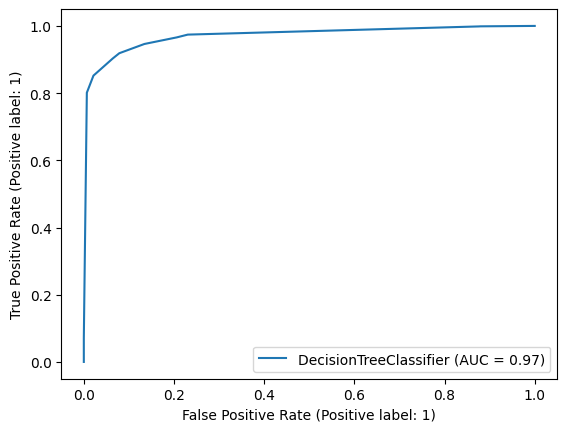

In [ ]:
X_test_KDD_DT, Y_test_KDD_DT, Pred_Value_KDD_DT =Evaluate('Decision Tree Classifier', DT_KDD, X_test_train_KDD, Y_test_train_KDD)

#### Random Forest

In [ ]:
max_depth= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Parameters={ 'max_depth': max_depth}

In [ ]:
RF_KDD = RandomForestClassifier()
GridSearch(RF_KDD, Parameters, X_train_train_KDD, Y_train_train_KDD)
RF_KDD.fit(X_train_train_KDD, Y_train_train_KDD)

RandomForestClassifier()

--------------------------------------------------

The Random Forest Classifier Model Accuracy   = 0.999016

The Random Forest Classifier Model Sensitvity = 0.99824

The Random Forest Classifier Model Precision  = 0.999661

The Random Forest Classifier Model F1 Score   = 0.99895

The Random Forest Classifier Model Recall     = 0.99824

--------------------------------------------------



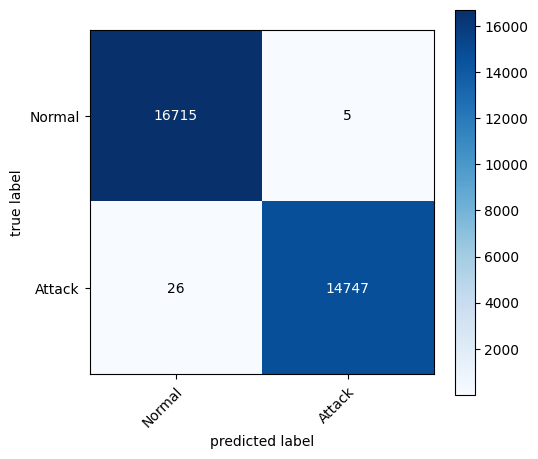

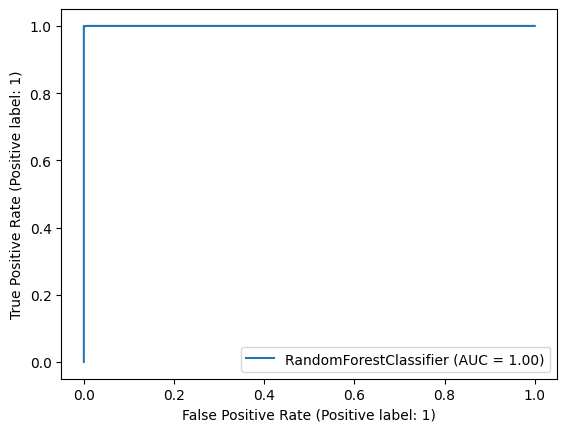

In [ ]:
X_test_KDD_RF, Y_test_KDD_RF, Pred_Value_KDD_RF = Evaluate('Random Forest Classifier', RF_KDD, X_test_train_KDD, Y_test_train_KDD)

#### KNN

In [ ]:
KNN_KDD = KNeighborsClassifier(n_neighbors=6)
KNN_KDD.fit(X_train_train_KDD, Y_train_train_KDD)

KNeighborsClassifier(n_neighbors=6)

--------------------------------------------------

The KNN Model Accuracy   = 0.992411

The KNN Model Sensitvity = 0.989508

The KNN Model Precision  = 0.994286

The KNN Model F1 Score   = 0.991891

The KNN Model Recall     = 0.989508

--------------------------------------------------



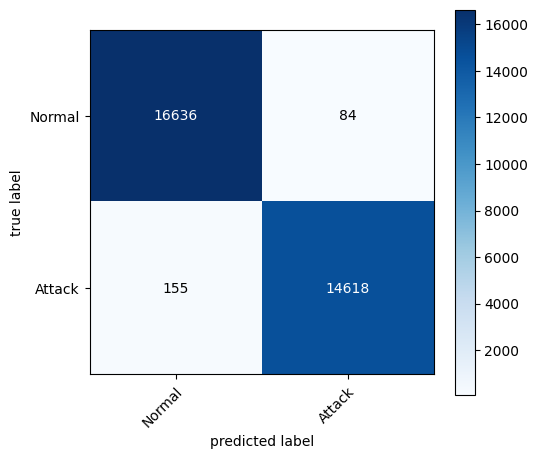

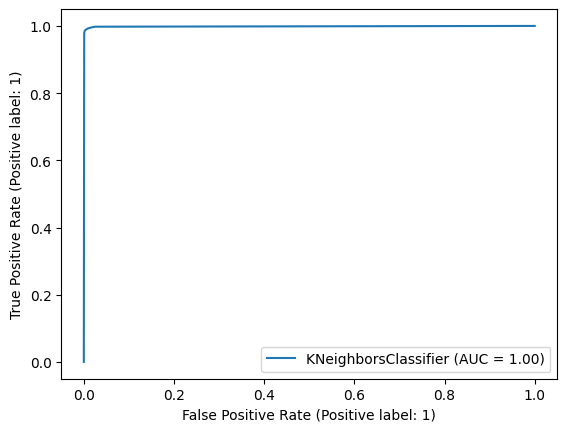

In [ ]:
X_test_KDD_KNN, Y_test_KDD_KNN, Pred_Value_KDD_KNN =Evaluate('KNN', KNN_KDD, X_test_train_KDD, Y_test_train_KDD)

#### SVM

In [ ]:
Linear_SVC_KDD = svm.LinearSVC(C=1)
Linear_SVC_KDD.fit(X_train_train_KDD, Y_train_train_KDD)

LinearSVC(C=1)

--------------------------------------------------

The SVM Linear SVC Kernel Model Accuracy   = 0.965611

The SVM Linear SVC Kernel Model Sensitvity = 0.95221

The SVM Linear SVC Kernel Model Precision  = 0.973899

The SVM Linear SVC Kernel Model F1 Score   = 0.962933

The SVM Linear SVC Kernel Model Recall     = 0.95221

--------------------------------------------------



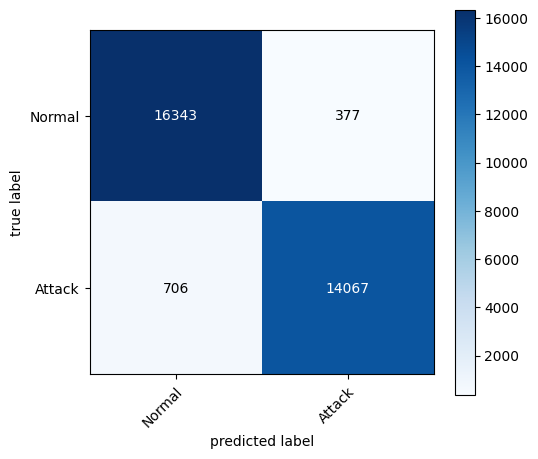

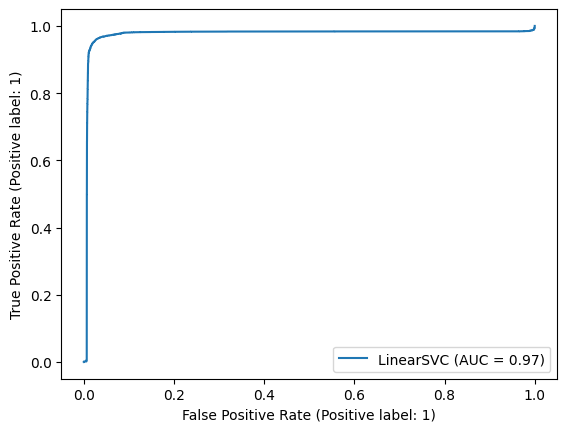

In [ ]:
X_test_KDD_SVM, Y_test_KDD_SVM, Pred_Value_KDD_SVM =Evaluate('SVM Linear SVC Kernel', Linear_SVC_KDD, X_test_train_KDD, Y_test_train_KDD)

# Saving results to CSV
for further features on classifying which type of attack it was, we are saving the results from the Best Performed model using KDD dataset

In [ ]:
def result(X_test, Y_test, Pred_Value):
# (122column, id as index, attack_state)

    # df_X_test = pd.DataFrame(X_test)
    df_Pred_Value_m = pd.Series(Pred_Value).rename('pred')
    m_Y_test = Y_test.reset_index()
    m_Y_test.columns = ['id', 'attack_state']

    # result = pd.concat([df_X_test, m_Y_test, df_Pred_Value_m], axis=1)
    result = pd.concat([m_Y_test, df_Pred_Value_m], axis=1)
    result = result.set_index('id')

    # count correct rows
    matching_df = (result['attack_state'] == result['pred']).sum()
    print(f"number of correct perdiction is: {matching_df}")
    print(f"total number of rows are: {len(X_test)}")

    # filter attacks
    filtered_df = result[result['attack_state'] == 1]
    print(f"number of rows that are attack is: {len(filtered_df)}")
    filtered_df

    return result, filtered_df

In [ ]:
# Logistic Regression
result_KDD_lr, filtered_KDD_lr = result(X_test_KDD_LR, Y_test_KDD_LR, Pred_Value_KDD_LR)
result_KDD_lr.to_csv(r'/content/drive/MyDrive/24Spring/NSP/Project/outcome/modeling_result_kdd_lr.csv',index = True)
filtered_KDD_lr.to_csv(r'/content/drive/MyDrive/24Spring/NSP/Project/outcome/modeling_attacks_kdd_lr.csv',index = True)

number of correct perdiction is: 27105
total number of rows are: 31493
number of rows that are attack is: 14773


In [ ]:
# Decision Tree
result_KDD_dt, filtered_KDD_dt = result(X_test_KDD_DT, Y_test_KDD_DT, Pred_Value_KDD_DT)
result_KDD_dt.to_csv(r'/content/drive/MyDrive/24Spring/NSP/Project/outcome/modeling_result_kdd_dt.csv',index = True)
filtered_KDD_dt.to_csv(r'/content/drive/MyDrive/24Spring/NSP/Project/outcome/modeling_attacks_kdd_dt.csv',index = True)

number of correct perdiction is: 28989
total number of rows are: 31493
number of rows that are attack is: 14773


In [ ]:
# Random Forest
result_KDD_rf, filtered_KDD_rf = result(X_test_KDD_RF, Y_test_KDD_RF, Pred_Value_KDD_RF)
result_KDD_rf.to_csv(r'/content/drive/MyDrive/24Spring/NSP/Project/outcome/modeling_result_kdd_rf.csv',index = True)
filtered_KDD_rf.to_csv(r'/content/drive/MyDrive/24Spring/NSP/Project/outcome/modeling_attacks_kdd_rf.csv',index = True)

number of correct perdiction is: 31462
total number of rows are: 31493
number of rows that are attack is: 14773


In [ ]:
# KNN
result_KDD_knn, filtered_KDD_knn = result(X_test_KDD_KNN, Y_test_KDD_KNN, Pred_Value_KDD_KNN)
result_KDD_knn.to_csv(r'/content/drive/MyDrive/24Spring/NSP/Project/outcome/modeling_result_kdd_knn.csv',index = True)
filtered_KDD_knn.to_csv(r'/content/drive/MyDrive/24Spring/NSP/Project/outcome/modeling_attacks_kdd_knn.csv',index = True)

number of correct perdiction is: 31254
total number of rows are: 31493
number of rows that are attack is: 14773


In [ ]:
# SVM
result_KDD_svm, filtered_KDD_svm = result(X_test_KDD_SVM, Y_test_KDD_SVM, Pred_Value_KDD_SVM)
result_KDD_svm.to_csv(r'/content/drive/MyDrive/24Spring/NSP/Project/outcome/modeling_result_kdd_svm.csv',index = True)
filtered_KDD_svm.to_csv(r'/content/drive/MyDrive/24Spring/NSP/Project/outcome/modeling_attacks_kdd_svm.csv',index = True)

number of correct perdiction is: 30410
total number of rows are: 31493
number of rows that are attack is: 14773
